## Case-Study-EDA

### Real world datasets - ML Project

#### **0) Goal (What to expect as end result?)**
- To do some comparision between the 2 datasets / Understanding of vehicle sales in India
- Also can I do some predictions with that?

#### **1) Dataset Download**
- **Dataset-1: Electric Vehicle Sales in India**
    - **Reference:** https://www.kaggle.com/datasets/praveenchoudhary1217/electric-vehicle-sales-in-india
    - **Columns (Features):** Year, 2W, 3W, 4W, Bus, Total
    - **Data Types:** Date, Decimal, Decimal, Decimal, Decimal, Decimal
    - **Row count:** 74

- **Dataset-2: Overall Vehicle Sales in India**
    - **Reference:** https://datasource.kapsarc.org/explore/dataset/sales-of-motor-vehicles-in-indiaincluding-exports/information/
    - **Columns (Features):** Year, Type, Value
    - **Data Types:** Date, Text, Decimal
    - **Row count:** 136


#### **2.1)Prepare the Datasets (Understanding, Statistical Analysis, Cleaning, and Preprocessing)**

##### Understanding Datasets & Statistical Analysis

In [1]:
import pandas as pd
ev_df = pd.read_excel("Ev Sales.xlsx")

In [2]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [3]:
ev_df.describe()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
count,74,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2020-04-16 04:12:58.378378496,16938.729730,14851.351351,1272.567568,82.310811,33144.959459
min,2017-04-01 00:00:00,85.000000,668.000000,3.000000,0.000000,958.000000
25%,2018-10-08 18:00:00,1304.250000,7782.250000,187.750000,11.250000,9147.000000
50%,2020-04-16 00:00:00,3014.500000,10619.500000,317.500000,74.500000,14526.000000
75%,2021-10-24 06:00:00,23599.000000,18641.750000,1545.000000,113.500000,43902.750000
max,2023-05-01 00:00:00,105154.000000,45225.000000,8852.000000,331.000000,157788.000000
std,NaN,25846.636971,11002.517635,1841.195763,79.696672,38251.453387


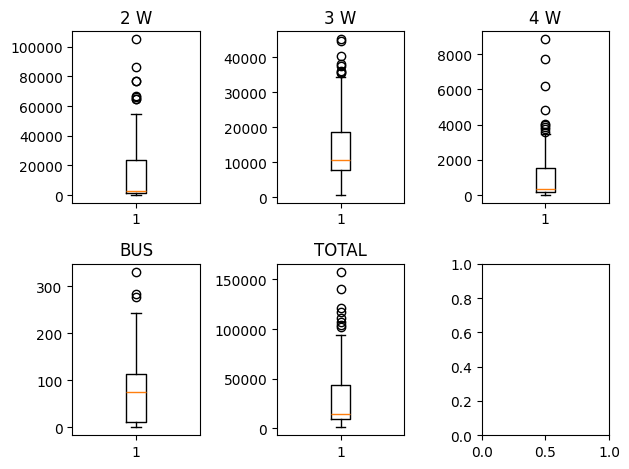

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3)

axes[0][0].boxplot(ev_df["2 W"])
axes[0][0].set_title("2 W")

axes[0][1].boxplot(ev_df["3 W"])
axes[0][1].set_title("3 W")

axes[0][2].boxplot(ev_df["4 W"])
axes[0][2].set_title("4 W")

axes[1][0].boxplot(ev_df["BUS"])
axes[1][0].set_title("BUS")

axes[1][1].boxplot(ev_df["TOTAL"])
axes[1][1].set_title("TOTAL")

plt.tight_layout()
plt.show()

In [5]:
all_df = pd.read_excel("All Vehicles Sales.xlsx")

In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    136 non-null    int64 
 1   type    136 non-null    object
 2   value   136 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [7]:
all_df.describe()

,Year,value
count,136.000000,1.360000e+02
mean,2012.992647,5.343530e+06
std,3.817108,7.305202e+06
min,2007.000000,6.270000e+02
25%,2010.000000,4.831192e+05
50%,2013.000000,9.318980e+05
75%,2016.000000,8.958093e+06
max,2019.000000,2.626618e+07


In [8]:
all_df.head()

,Year,type,value
0,2007,M & HCV,296675
1,2009,M & HCV,265369
2,2009,LCVs,312361
3,2012,LCVs,585025
4,2017,LCVs,516135


In [9]:
set(all_df["type"])

{'Electric Two-Wheelers',
 'LCVs',
 'M & HCV',
 'Mopeds',
 'Motor Cycles',
 'Multi-Utility Vehivles',
 'Passenger Cars',
 'Quadricycle',
 'Scooters',
 'Total',
 'Total Two-Wheelers',
 'Total commercial Vehicles'}

In [10]:
all_df.shape

(136, 3)

In [11]:
ev_df.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


##### Cleaning and Preprocessing Datasets

In [12]:
# Extract only "year" from ev_df YEAR column

def extract_year(x):
    #return(x.year)
    return(int(str(x).split("-")[0]))

def extract_month(x):
    #return(x.year)
    return(int(str(x).split("-")[1]))

ev_df["year"] = ev_df["YEAR"].map(extract_year)
ev_df["month"] = ev_df["YEAR"].map(extract_month)

In [13]:
# Dropped "YEAR" column
ev_df = ev_df.drop(columns=["YEAR"])

In [14]:
ev_df.head()

,2 W,3 W,4 W,BUS,TOTAL,year,month
0,96,4748,198,0,5042,2017,4
1,91,6720,215,2,7028,2017,5
2,137,7178,149,1,7465,2017,6
3,116,8775,120,0,9011,2017,7
4,99,8905,137,0,9141,2017,8


In [15]:
all_df.head()

,Year,type,value
0,2007,M & HCV,296675
1,2009,M & HCV,265369
2,2009,LCVs,312361
3,2012,LCVs,585025
4,2017,LCVs,516135


In [16]:
all_df["Year"].describe()

count     136.000000
mean     2012.992647
std         3.817108
min      2007.000000
25%      2010.000000
50%      2013.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [17]:
all_df[all_df["type"]=="Total"]

# There are 13 Totals, which means 1 for each year

,Year,type,value
24,2015,Total,24112465
52,2013,Total,21533807
77,2007,Total,10892768
78,2010,Total,17852489
79,2012,Total,20714277
80,2017,Total,24981312
81,2019,Total,21546390
98,2011,Total,20299674
99,2018,Total,26266179
132,2008,Total,11254837


In [18]:
"""
REMOVE:
'Electric Two-Wheelers'
'LCVs'
'M & HCV'
'Total'
'Total Two-Wheelers'
'Total commercial Vehicles'
"""

"""
MAP:
 'Mopeds': "2 W"
 'Motor Cycles': "2 W"
 'Multi-Utility Vehivles': "4 W"
 'Passenger Cars': "4 W"
 'Quadricycle': "4 W"
 'Scooters': "2 W"
"""

'\nMAP:\n \'Mopeds\': "2 W"\n \'Motor Cycles\': "2 W"\n \'Multi-Utility Vehivles\': "4 W"\n \'Passenger Cars\': "4 W"\n \'Quadricycle\': "4 W"\n \'Scooters\': "2 W"\n'

In [19]:
required_type_rows = []

for idx, row in enumerate(all_df["type"]):
    if row in ["Mopeds", "Motor Cycles", "Multi-Utility Vehivles", "Passenger Cars", "Quadricycle", "Scooters"]:
        required_type_rows.append(idx)

new_all_df = all_df.loc[required_type_rows]

In [20]:
vehicle_type_map = {
'Mopeds': "2 W",
'Motor Cycles': "2 W",
'Multi-Utility Vehivles': "4 W",
'Passenger Cars': "4 W",
'Quadricycle': "4 W",
'Scooters': "2 W"}

# REPLACING "type" that matches with another dataset

new_all_df["type"] = new_all_df["type"].map(vehicle_type_map)
new_all_df.head()

,Year,type,value
8,2011,4 W,2532852
9,2015,4 W,2557727
10,2008,4 W,228655
11,2010,4 W,328001
12,2016,4 W,916255


In [21]:
ev_df.head()

,2 W,3 W,4 W,BUS,TOTAL,year,month
0,96,4748,198,0,5042,2017,4
1,91,6720,215,2,7028,2017,5
2,137,7178,149,1,7465,2017,6
3,116,8775,120,0,9011,2017,7
4,99,8905,137,0,9141,2017,8


#### 2.2) Prepare the Datasets (Preprocessing - Filtering and Grouping)

In [22]:
set(new_all_df["Year"])

{2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019}

In [23]:
new_all_df["type"].value_counts()

type
2 W    39
4 W    29
Name: count, dtype: int64

In [24]:
new_all_df[new_all_df["type"]=="4 W"]

,Year,type,value
8,2011,4 W,2532852
9,2015,4 W,2557727
10,2008,4 W,228655
11,2010,4 W,328001
12,2016,4 W,916255
13,2017,4 W,922322
23,2018,4 W,627
36,2010,4 W,2430105
37,2012,4 W,2440127
38,2013,4 W,2338044


In [25]:
#new_all_df.groupby(by=["Year","type"]).sum()

groupby_output = new_all_df.groupby(by=["Year","type"]).sum()

In [26]:
groupby_output.columns

Index(['value'], dtype='object')

In [27]:
groupby_output.head()

value
Year type          
2007 2 W    8051923
     4 W    1666412
2008 2 W    8415308
     4 W    1780665
2009 2 W   10508248

In [28]:
groupby_output.index[:5]

MultiIndex([(2007, '2 W'),
            (2007, '4 W'),
            (2008, '2 W'),
            (2008, '4 W'),
            (2009, '2 W')],
           names=['Year', 'type'])

In [29]:
pd.DataFrame(list(groupby_output.index)).head()

,0,1
0,2007,2 W
1,2007,4 W
2,2008,2 W
3,2008,4 W
4,2009,2 W


In [30]:
# Instead of doing concat operation on 2 DataFrames (i.e) DataFrame-1 "Year" & "Type", and DataFrame-2 "Value"
# We just run reset_index() function on the groupby_output

required_all_df = groupby_output.reset_index()

In [31]:
required_all_df.head()

,Year,type,value
0,2007,2 W,8051923
1,2007,4 W,1666412
2,2008,2 W,8415308
3,2008,4 W,1780665
4,2009,2 W,10508248


In [32]:
ev_df.head()

,2 W,3 W,4 W,BUS,TOTAL,year,month
0,96,4748,198,0,5042,2017,4
1,91,6720,215,2,7028,2017,5
2,137,7178,149,1,7465,2017,6
3,116,8775,120,0,9011,2017,7
4,99,8905,137,0,9141,2017,8


In [33]:
required_ev_df = ev_df.groupby(by=["year"]).sum().reset_index()

In [34]:
required_ev_df.head()

,year,2 W,3 W,4 W,BUS,TOTAL,month
0,2017,1211,69307,1591,14,72123,72
1,2018,17062,110375,2500,680,130617,78
2,2019,30389,133489,1749,1093,166720,78
3,2020,29112,90361,4323,88,123884,78
4,2021,156182,147180,14142,1180,318684,78


#### 3.1) Feature Engineering

In [35]:
required_all_df[required_all_df["type"]=="2 W"]

,Year,type,value
0,2007,2 W,8051923
2,2008,2 W,8415308
4,2009,2 W,10508248
6,2010,2 W,13329895
8,2011,2 W,15384261
10,2012,2 W,15758689
12,2013,2 W,16890778
14,2014,2 W,18462178
16,2015,2 W,18938727
18,2016,2 W,19930015


In [36]:
len(required_all_df[required_all_df["type"]=="4 W"])

# There are 13 items, which means 1 for each year

13

In [37]:
# Using "for loop" and extracting only the required data for creating "required_all_df"

temp_list = []
current_year = 2007
for two_w, four_w in zip(required_all_df[required_all_df["type"]=="2 W"]["value"], required_all_df[required_all_df["type"]=="4 W"]["value"]):
    #print(two_w, four_w)
    temp_list.append([current_year, two_w, four_w])
    current_year = current_year + 1

print(required_ev_df.columns)

# OVERWRITING required_all_df with latest transformation !!!
required_all_df = pd.DataFrame(temp_list, columns=["year","2 W","4 W"])

Index(['year', '2 W', '3 W', '4 W', 'BUS', 'TOTAL', 'month'], dtype='object')


In [38]:
from copy import deepcopy
ALL_required_df = deepcopy(required_all_df)
EV_required_df = deepcopy(required_ev_df)

In [39]:
ALL_required_df["TOTAL"] = ALL_required_df["2 W"] + ALL_required_df["4 W"]
ALL_required_df.head()

,year,2 W,4 W,TOTAL
0,2007,8051923,1666412,9718335
1,2008,8415308,1780665,10195973
2,2009,10508248,2245609,12753857
3,2010,13329895,2758106,16088001
4,2011,15384261,2901845,18286106


In [40]:
EV_actual_df = deepcopy(EV_required_df)

In [41]:
EV_required_df = EV_required_df.drop(columns=["3 W", "BUS", "TOTAL", "month"])
EV_required_df.head()

,year,2 W,4 W
0,2017,1211,1591
1,2018,17062,2500
2,2019,30389,1749
3,2020,29112,4323
4,2021,156182,14142


In [42]:
EV_required_df["TOTAL"] = EV_required_df["2 W"] + EV_required_df["4 W"]

In [43]:
EV_required_df["year"]

0    2017
1    2018
2    2019
3    2020
4    2021
5    2022
6    2023
Name: year, dtype: int64

In [44]:
ALL_required_df["year"]

0     2007
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
12    2019
Name: year, dtype: int64

In [45]:
EV_required_df.head()

,year,2 W,4 W,TOTAL
0,2017,1211,1591,2802
1,2018,17062,2500,19562
2,2019,30389,1749,32138
3,2020,29112,4323,33435
4,2021,156182,14142,170324


In [46]:
ALL_required_df.head()

,year,2 W,4 W,TOTAL
0,2007,8051923,1666412,9718335
1,2008,8415308,1780665,10195973
2,2009,10508248,2245609,12753857
3,2010,13329895,2758106,16088001
4,2011,15384261,2901845,18286106


#### 3.2) Plotting and Visualizing the Features

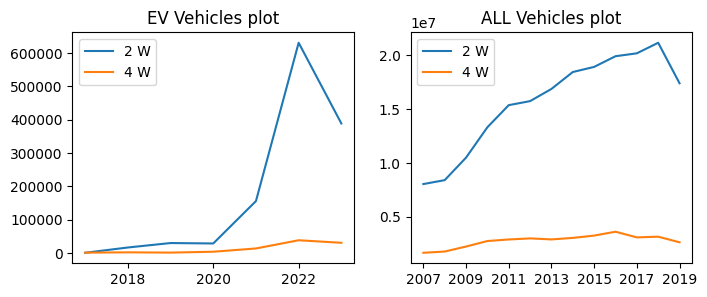

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
fig.set_figwidth(8)
fig.set_figheight(3)

axes[0].plot(EV_required_df["year"], EV_required_df["2 W"])
axes[0].plot(EV_required_df["year"], EV_required_df["4 W"])
axes[0].legend(["2 W","4 W"])
axes[0].set_title("EV Vehicles plot")


axes[1].plot(ALL_required_df["year"], ALL_required_df["2 W"])
axes[1].plot(ALL_required_df["year"], ALL_required_df["4 W"])
axes[1].legend(["2 W","4 W"])
axes[1].set_title("ALL Vehicles plot")


# 1.5 * 10^7 = 1,50,00,000
# "tick" --> related to the axis markings

#axes[1].set_xticklabels([2007])
#axes[1].set_xticks([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
axes[1].set_xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019])

In [48]:
# In 2017, the sales of EV 2W vehicle was very low
# But in 2022, the sale of EV 2W was at the peak maximum
# Eventually in 2023, there is a slight downfall of EV 2W sales

Text(0.5, 1.0, 'Electric Vehicles')

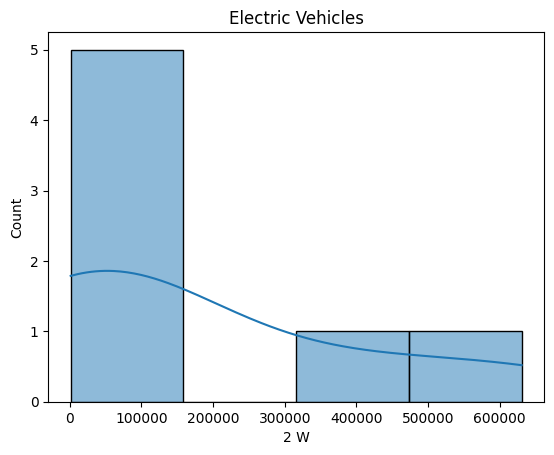

In [49]:
import seaborn as sns

sns.histplot(EV_required_df["2 W"], kde=True)
plt.title("Electric Vehicles")

Text(0.5, 1.0, 'ALL Vehicles')

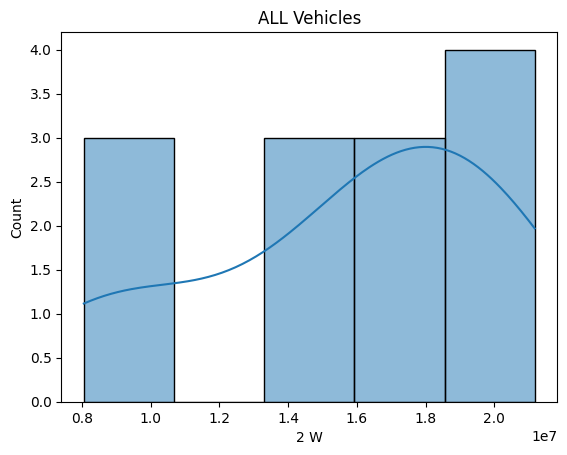

In [50]:
import seaborn as sns

sns.histplot(ALL_required_df["2 W"], kde=True)
plt.title("ALL Vehicles")

<Axes: >

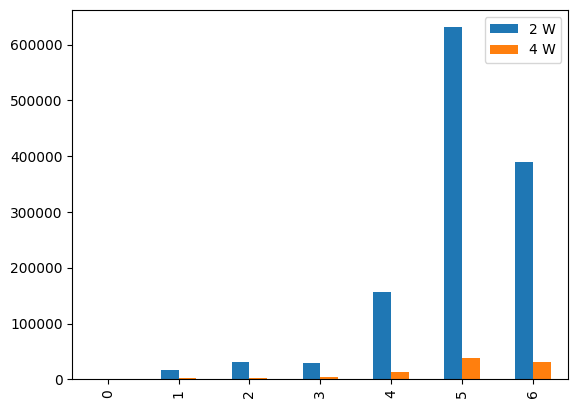

In [51]:
EV_required_df[["2 W", "4 W"]].plot(kind="bar")

<Axes: xlabel='year', ylabel='2 W'>

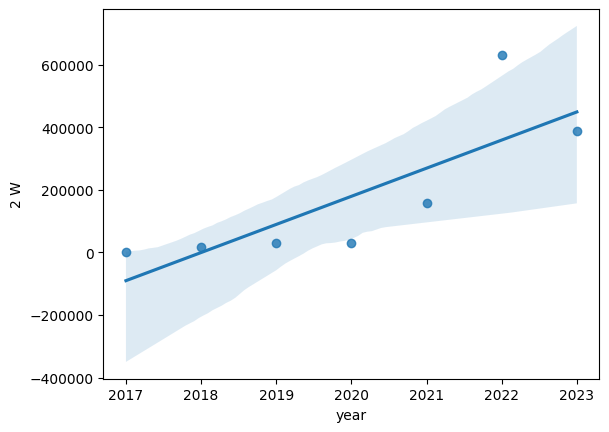

In [52]:
sns.regplot(EV_required_df, x="year", y="2 W")

<Axes: xlabel='2 W', ylabel='4 W'>

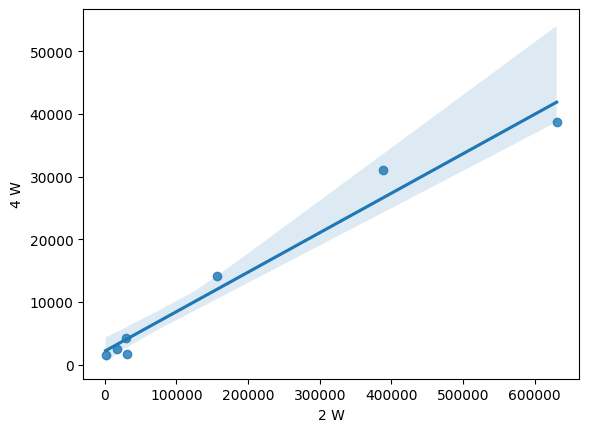

In [53]:
sns.regplot(EV_required_df, x="2 W", y="4 W")

#### 3.3) Feature Engineering - Joins

In [54]:
# JOIN BOTH DataFrames. Keeping Year as the common Feature.

In [55]:
EV_required_df.columns

Index(['year', '2 W', '4 W', 'TOTAL'], dtype='object')

In [56]:
ALL_required_df.columns

Index(['year', '2 W', '4 W', 'TOTAL'], dtype='object')

In [57]:
print(list(EV_required_df["year"]))
print(list(ALL_required_df["year"]))

[2017, 2018, 2019, 2020, 2021, 2022, 2023]
[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [58]:
EV_required_df.merge(ALL_required_df, on="year", how="inner")

,year,2 W_x,4 W_x,TOTAL_x,2 W_y,4 W_y,TOTAL_y
0,2017,1211,1591,2802,20200117,3096346,23296463
1,2018,17062,2500,19562,21179847,3160590,24340437
2,2019,30389,1749,32138,17417616,2642393,20060009


In [59]:
COMBINED_df = EV_required_df.merge(ALL_required_df, on="year", how="inner")

In [60]:
COMBINED_df.describe()

,year,2 W_x,4 W_x,TOTAL_x,2 W_y,4 W_y,TOTAL_y
count,3.0,3.000000,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000e+00
mean,2018.0,16220.666667,1946.666667,18167.333333,1.959919e+07,2.966443e+06,2.256564e+07
std,1.0,14607.183244,485.668954,14717.644014,1.951775e+06,2.824679e+05,2.231837e+06
min,2017.0,1211.000000,1591.000000,2802.000000,1.741762e+07,2.642393e+06,2.006001e+07
25%,2017.5,9136.500000,1670.000000,11182.000000,1.880887e+07,2.869370e+06,2.167824e+07
50%,2018.0,17062.000000,1749.000000,19562.000000,2.020012e+07,3.096346e+06,2.329646e+07
75%,2018.5,23725.500000,2124.500000,25850.000000,2.068998e+07,3.128468e+06,2.381845e+07
max,2019.0,30389.000000,2500.000000,32138.000000,2.117985e+07,3.160590e+06,2.434044e+07


In [61]:
ALL_required_df.columns = ["year", "two_w", "four_w", "total"]

In [62]:
ALL_required_df

,year,two_w,four_w,total
0,2007,8051923,1666412,9718335
1,2008,8415308,1780665,10195973
2,2009,10508248,2245609,12753857
3,2010,13329895,2758106,16088001
4,2011,15384261,2901845,18286106
5,2012,15758689,3002048,18760737
6,2013,16890778,2907316,19798094
7,2014,18462178,3048822,21511000
8,2015,18938727,3263044,22201771
9,2016,19930015,3623792,23553807


#### 5.1) Apply "ML algorithm" - Univariate

In [63]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula='four_w ~ two_w', data=ALL_required_df).fit()

In [64]:
# This command gives the prediction of "four_w" sales count
# For the input of "two_w" sales, we give 10 as its sales count

model1.predict(pd.Series([10], name="two_w"))

0    908497.399125
dtype: float64

#### 5.2) Apply "ML algorithm" - Multivariate
- Refer: https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

In [65]:
import statsmodels.formula.api as smf
model2 = smf.ols(formula='four_w ~ two_w + total', data=ALL_required_df).fit()

In [66]:
# This command gives the prediction of "four_w" sales count
# For the input of "two_w" sales, we give 50000 as its sales count
# For the input of "total" sales, we give 70000 as its sales count

model2.predict(pd.DataFrame(data=[[50000,70000]], columns=["two_w","total"]))

0    20000.0
dtype: float64

#### 7) Prediction results summary study

In [67]:
predicted_4w_series_model1 = model1.predict(ALL_required_df[["two_w"]])

predicted_4w_series_model2 = model2.predict(ALL_required_df[["two_w", "total"]])

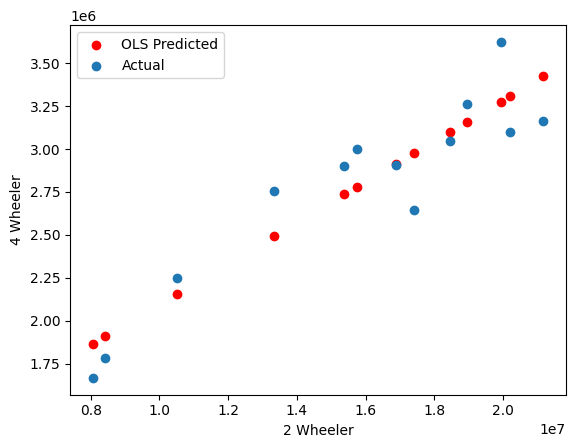

In [68]:
# NOT 100% accurate - because we used only one input feature ("2W count")
# For training the model1 with the target "4W count"

import matplotlib.pyplot as plt

plt.scatter(ALL_required_df["two_w"], predicted_4w_series_model1, color="red", label="OLS Predicted")

plt.scatter(ALL_required_df["two_w"], ALL_required_df["four_w"], label="Actual")

plt.xlabel("2 Wheeler")
plt.ylabel("4 Wheeler")

plt.legend()

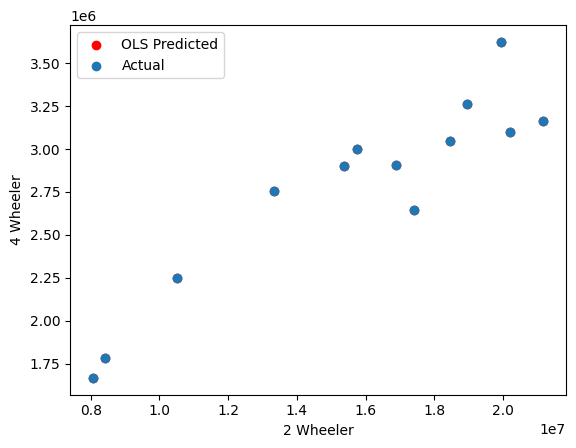

In [69]:
# 100% accuracy - because we used two simple logical input features ("2W count", "total")
# For training the model2 with the target "4W count"

import matplotlib.pyplot as plt

plt.scatter(ALL_required_df["two_w"], predicted_4w_series_model2, color="red", label="OLS Predicted")

plt.scatter(ALL_required_df["two_w"], ALL_required_df["four_w"], label="Actual")

plt.xlabel("2 Wheeler")
plt.ylabel("4 Wheeler")

plt.legend()